## Name: HARSH SAOJI
## Roll No: 38
## Section: A(A3)
## Practical 6
## Multilayer Feed-Forward Neural Network

# Classifying Handwritten digits using Tensorflow 2.x

## Problem Statement

#### **Dataset Description**


The **[MNIST Handwritten Digit Classification Dataset](http://yann.lecun.com/exdb/mnist/)** consists of 60,000 training images and 10,000 testing images of handwritten digits.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

![alt text](https://i.imgur.com/Su00XUA.png)



# Solution: Classifying Handwritten digits using Tensorflow 2.x

## Installing TensorFlow 2.x

In [ ]:
# !pip install tensorflow

In [ ]:
#verify the installation
import tensorflow as tf
from tensorflow import keras

#Check tf.keras version
print(tf.__version__)


2.17.1


## Preparing the Data

### Loading the Data

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) and convert the samples from integers to floating-point numbers and deal with categorical data:

In [ ]:
# Loading MNIST dataset
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Data Exploration
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### Data Preprocessing

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
# X_train is 60000 rows of 28x28 values; we reshape it to # 60000 x 784.
RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)

# Data is converted into float32 to use 32-bit precision # when training a neural network
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the input to be within the range [0,1]
X_train /= 255
X_test /= 255

print(X_train.shape, 'train samples')
print(X_test.shape, 'test samples')

# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)

(60000, 784) train samples
(10000, 784) test samples


## Designing the Model

### Preparing the Model 0: Single layer Perceptron

Build the `Sequential` model with 0 hidden layers. Choose an optimizer and loss function for training:

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_0 = Sequential()

In [ ]:
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 10)
model_0.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compiling the model.
model_0.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model.
training = model_0.fit(X_train, Y_train, batch_size=64, epochs=70, validation_split=0.2)

Epoch 1/70
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6156 - loss: 1.4674 - val_accuracy: 0.8575 - val_loss: 0.6574
Epoch 2/70
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8524 - loss: 0.6412 - val_accuracy: 0.8779 - val_loss: 0.5087
Epoch 3/70
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8702 - loss: 0.5241 - val_accuracy: 0.8877 - val_loss: 0.4496
Epoch 4/70
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8775 - loss: 0.4771 - val_accuracy: 0.8911 - val_loss: 0.4180
Epoch 5/70
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8814 - loss: 0.4441 - val_accuracy: 0.8960 - val_loss: 0.3964
Epoch 6/70
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8911 - loss: 0.4143 - val_accuracy: 0.8995 - val_loss: 0.3812
Epoch 7/70
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8923 - loss: 0.4025 - val_accuracy: 0.9015 - val_loss: 0.3697
Epoch 8/70
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8946 - loss: 0.3915 - val_accuracy: 0.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


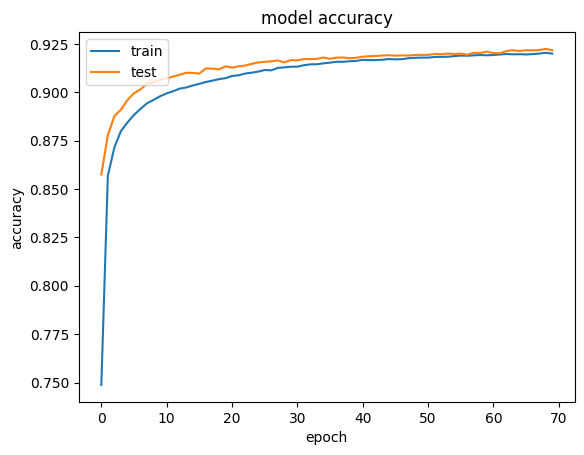

In [ ]:
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

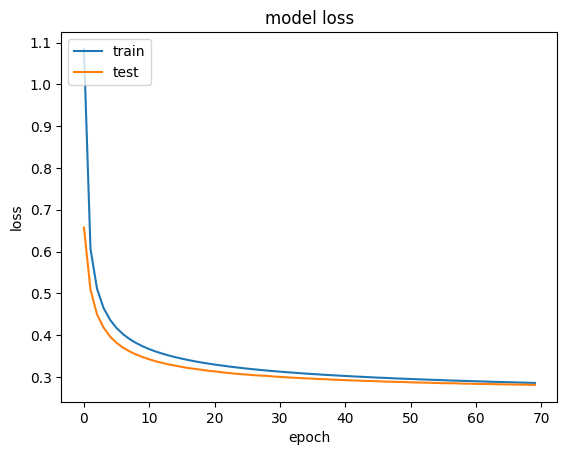

In [ ]:
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = model_0.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.9112 - loss: 0.3211
Test accuracy: 0.9225999712944031


In [ ]:
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_layer (Dense)                  │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,852 (30.68 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### Improved Model 1: Adding Hidden Layer - Multi Layer Perceptron

In [ ]:
#Most common type of model is a stack of layers
model_1 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_1.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
model_1.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_1.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [ ]:
# Compiling the model.
model_1.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model.
training = model_1.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2)

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5295 - loss: 1.5789 - val_accuracy: 0.8729 - val_loss: 0.4783
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8765 - loss: 0.4597 - val_accuracy: 0.9005 - val_loss: 0.3512
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8992 - loss: 0.3576 - val_accuracy: 0.9112 - val_loss: 0.3077
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9065 - loss: 0.3228 - val_accuracy: 0.9200 - val_loss: 0.2790
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9161 - loss: 0.2912 - val_accuracy: 0.9268 - val_loss: 0.2592
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9233 - loss: 0.2621 - val_accuracy: 0.9313 - val_loss: 0.2430
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9266 - loss: 0.2528 - val_accuracy: 0.9352 - val_loss: 0.2313
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9332 - loss: 0.2328 - val_accu

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


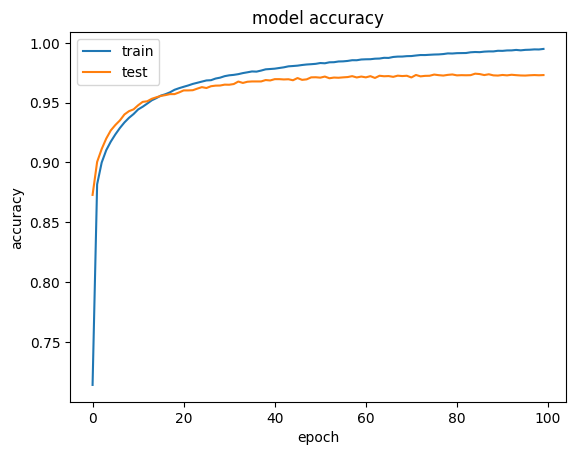

In [ ]:
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

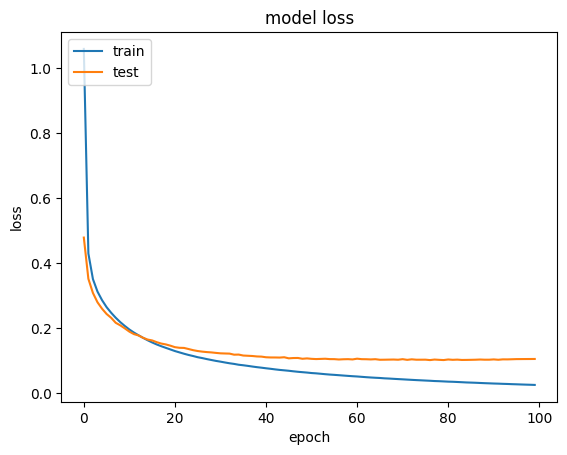

In [ ]:
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9662 - loss: 0.1129
Test accuracy: 0.9700999855995178


In [ ]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_layer (Dense)                  │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_2 (Dense)                │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_3 (Dense)                │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,052 (215.05 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model_1.weights

[<KerasVariable shape=(784, 64), dtype=float32, path=sequential_1/dense_layer/kernel>,
 <KerasVariable shape=(64,), dtype=float32, path=sequential_1/dense_layer/bias>,
 <KerasVariable shape=(64, 64), dtype=float32, path=sequential_1/dense_layer_2/kernel>,
 <KerasVariable shape=(64,), dtype=float32, path=sequential_1/dense_layer_2/bias>,
 <KerasVariable shape=(64, 10), dtype=float32, path=sequential_1/dense_layer_3/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential_1/dense_layer_3/bias>]

### Improved Model 2 - Adding Dropout to Avoid Overfitting

In [ ]:
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_2 = tf.keras.Sequential()
N_hidden = 128

# Adds a densely-connected layer with 128 units to the model:
model_2.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
model_2.add(Dropout(0.3))

# Adding another dense layer:
model_2.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_2.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_2.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [ ]:
# Compiling the model.
model_2.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model.
training = model_2.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4367 - loss: 1.7066 - val_accuracy: 0.8692 - val_loss: 0.5357
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7851 - loss: 0.7018 - val_accuracy: 0.8990 - val_loss: 0.3780
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8404 - loss: 0.5318 - val_accuracy: 0.9076 - val_loss: 0.3219
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8640 - loss: 0.4604 - val_accuracy: 0.9150 - val_loss: 0.2860
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8743 - loss: 0.4219 - val_accuracy: 0.9222 - val_loss: 0.2628
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8865 - loss: 0.3861 - val_accuracy: 0.9263 - val_loss: 0.2442
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8934 - loss: 0.3577 - val_accuracy: 0.9323 - val_loss: 0.2296
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9015 - loss: 0.3359 - val_accuracy: 0.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


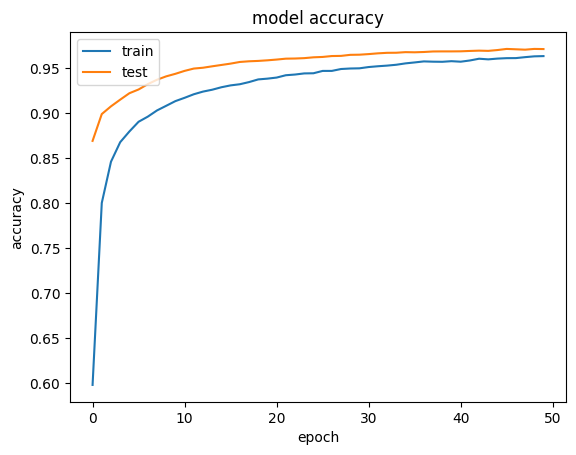

In [ ]:
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

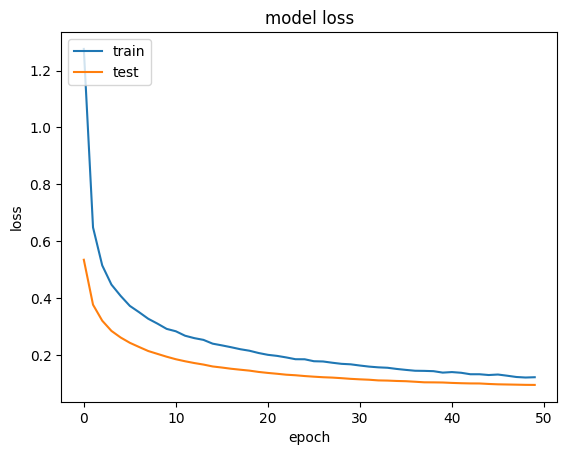

In [ ]:
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_2.weights[0]

<KerasVariable shape=(784, 128), dtype=float32, path=sequential_2/dense_layer/kernel>

In [ ]:
#evaluate the model
test_loss, test_acc = model_2.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9659 - loss: 0.1079
Test accuracy: 0.9714999794960022


In [ ]:
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_layer (Dense)                  │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_2 (Dense)                │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_3 (Dense)                │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,284 (462.05 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model_2.weights

[<KerasVariable shape=(784, 128), dtype=float32, path=sequential_2/dense_layer/kernel>,
 <KerasVariable shape=(128,), dtype=float32, path=sequential_2/dense_layer/bias>,
 <KerasVariable shape=(128, 128), dtype=float32, path=sequential_2/dense_layer_2/kernel>,
 <KerasVariable shape=(128,), dtype=float32, path=sequential_2/dense_layer_2/bias>,
 <KerasVariable shape=(128, 10), dtype=float32, path=sequential_2/dense_layer_3/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential_2/dense_layer_3/bias>]

In [ ]:
model_2.get_config()

{'name': 'sequential_2',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_2'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kerne

### Improved Model 3: Changing the Optimizer - Adam

In [ ]:
#Most common type of model is a stack of layers
model_3 = tf.keras.Sequential()
N_hidden = 64

# Adds a densely-connected layer with 64 units to the model:
model_3.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))

# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_3.add(Dropout(0.3))

# Adding another dense layer:
model_3.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_3.add(Dropout(0.3))

model_3.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [ ]:
# Compiling the model.
model_3.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model.
training = model_3.fit(X_train, Y_train, batch_size=128, epochs=20, validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6295 - loss: 1.1309 - val_accuracy: 0.9284 - val_loss: 0.2457
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8949 - loss: 0.3612 - val_accuracy: 0.9469 - val_loss: 0.1848
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9185 - loss: 0.2851 - val_accuracy: 0.9535 - val_loss: 0.1617
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9283 - loss: 0.2477 - val_accuracy: 0.9592 - val_loss: 0.1420
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9315 - loss: 0.2252 - val_accuracy: 0.9615 - val_loss: 0.1342
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9392 - loss: 0.2080 - val_accuracy: 0.9623 - val_loss: 0.1288
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9430 - loss: 0.1890 - val_accuracy: 0.9661 - val_loss: 0.1172
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9464 - loss: 0.1826 - val_accuracy: 0.

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


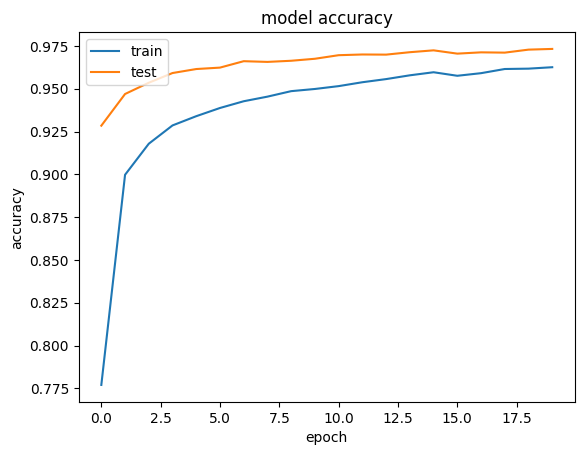

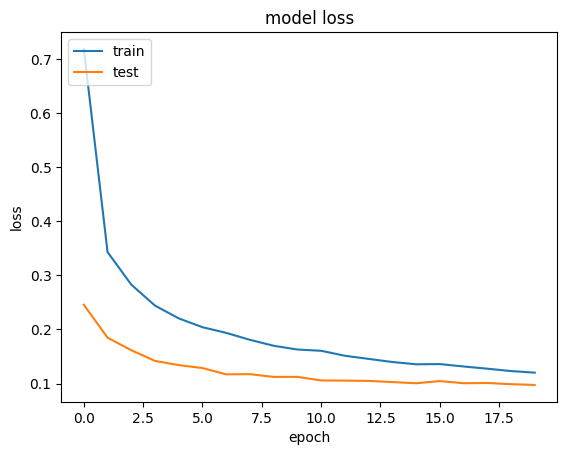

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = model_3.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9691 - loss: 0.1094
Test accuracy: 0.9731000065803528


In [ ]:
model_3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_layer (Dense)                  │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_2 (Dense)                │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_3 (Dense)                │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 165,152 (645.13 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 110,102 (430.09 KB)

In [ ]:
model_3.weights

[<KerasVariable shape=(784, 64), dtype=float32, path=sequential_3/dense_layer/kernel>,
 <KerasVariable shape=(64,), dtype=float32, path=sequential_3/dense_layer/bias>,
 <KerasVariable shape=(64, 64), dtype=float32, path=sequential_3/dense_layer_2/kernel>,
 <KerasVariable shape=(64,), dtype=float32, path=sequential_3/dense_layer_2/bias>,
 <KerasVariable shape=(64, 10), dtype=float32, path=sequential_3/dense_layer_3/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential_3/dense_layer_3/bias>]

In [ ]:
model_3.get_config()

{'name': 'sequential_3',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_3'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel

### Improved Model 4: Increasing the number of Hidden Layer neuron

In [ ]:
#Most common type of model is a stack of layers
model_4 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 512 units to the model:
model_4.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 512)
model_4.add(Dropout(0.3))
# Adding another dense layer:
model_4.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_4.add(Dropout(0.3))
# After the first layer, you don't need to specify
# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_4.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [ ]:
# Compiling the model.
model_4.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model.
training = model_4.fit(X_train, Y_train, batch_size=128, epochs=31, validation_split=0.2)

Epoch 1/31
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8396 - loss: 0.5290 - val_accuracy: 0.9632 - val_loss: 0.1236
Epoch 2/31
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9589 - loss: 0.1338 - val_accuracy: 0.9705 - val_loss: 0.0988
Epoch 3/31
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9727 - loss: 0.0887 - val_accuracy: 0.9746 - val_loss: 0.0846
Epoch 4/31
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9767 - loss: 0.0706 - val_accuracy: 0.9743 - val_loss: 0.0857
Epoch 5/31
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9809 - loss: 0.0590 - val_accuracy: 0.9763 - val_loss: 0.0786
Epoch 6/31
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9833 - loss: 0.0506 - val_accuracy: 0.9749 - val_loss: 0.0853
Epoch 7/31
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9850 - loss: 0.0439 - val_accuracy: 0.9783 - val_loss: 0.0769
Epoch 8/31
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9872 - loss: 0.0393 - val_accu

In [ ]:
#evaluate the model_4
test_loss, test_acc = model_4.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9798 - loss: 0.0980
Test accuracy: 0.9824000000953674


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


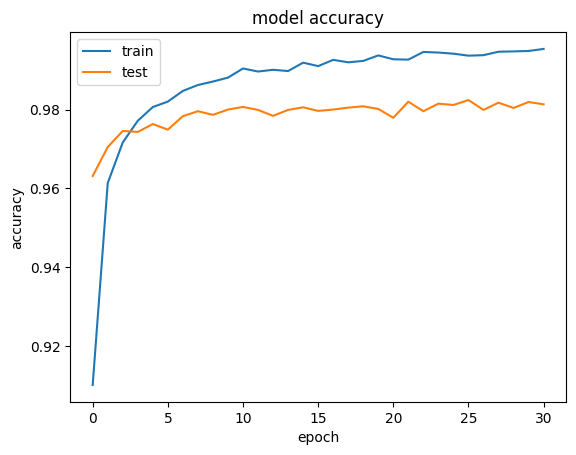

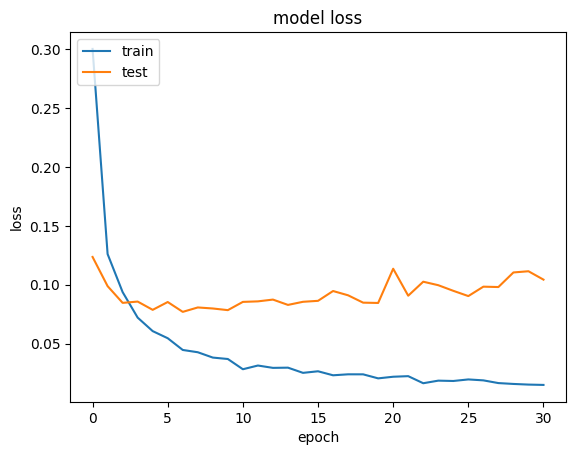

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_4.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_layer (Dense)                  │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_2 (Dense)                │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_3 (Dense)                │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,009,120 (7.66 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,339,414 (5.11 MB)

In [ ]:
model_4.weights

[<KerasVariable shape=(784, 512), dtype=float32, path=sequential_4/dense_layer/kernel>,
 <KerasVariable shape=(512,), dtype=float32, path=sequential_4/dense_layer/bias>,
 <KerasVariable shape=(512, 512), dtype=float32, path=sequential_4/dense_layer_2/kernel>,
 <KerasVariable shape=(512,), dtype=float32, path=sequential_4/dense_layer_2/bias>,
 <KerasVariable shape=(512, 10), dtype=float32, path=sequential_4/dense_layer_3/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential_4/dense_layer_3/bias>]

In [ ]:
model_4.get_config()

{'name': 'sequential_4',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_4'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kerne

### Improved Model 5: Manipulating the batch size

In [ ]:
#Most common type of model is a stack of layers
model_5 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_5.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_5.add(Dropout(0.3))
# Adding another dense layer:
model_5.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_5.add(Dropout(0.3))
# After the first layer, you don't need to specify
# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_5.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [ ]:
# Compiling the model.
model_5.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model.
training = model_5.fit(X_train, Y_train, batch_size=64, epochs=30, validation_split=0.2)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8526 - loss: 0.4757 - val_accuracy: 0.9605 - val_loss: 0.1300
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9608 - loss: 0.1275 - val_accuracy: 0.9692 - val_loss: 0.0951
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9702 - loss: 0.0918 - val_accuracy: 0.9751 - val_loss: 0.0829
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9765 - loss: 0.0757 - val_accuracy: 0.9737 - val_loss: 0.0928
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9803 - loss: 0.0651 - val_accuracy: 0.9743 - val_loss: 0.0860
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9829 - loss: 0.0513 - val_accuracy: 0.9778 - val_loss: 0.0785
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9843 - loss: 0.0488 - val_accuracy: 0.9780 - val_loss: 0.0867
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9847 - loss: 0.0470 - val_accuracy: 0.

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


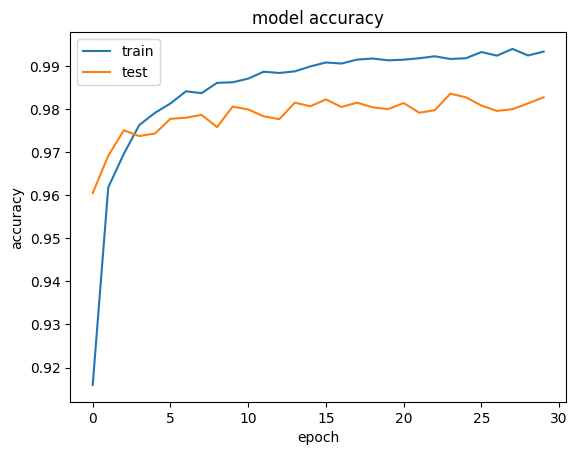

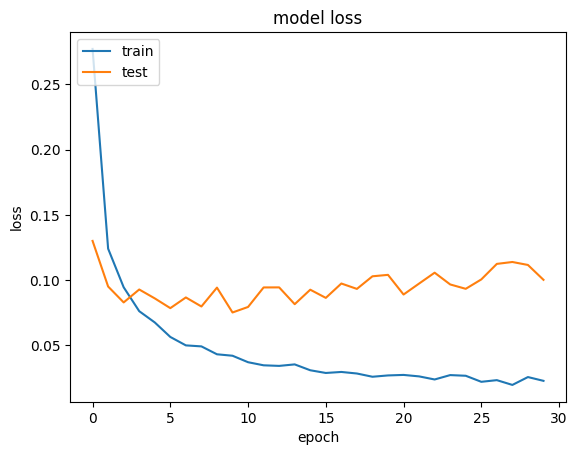

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = model_5.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9808 - loss: 0.1044
Test accuracy: 0.9850000143051147


In [ ]:
model_5.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_layer (Dense)                  │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_2 (Dense)                │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_3 (Dense)                │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,009,120 (7.66 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,339,414 (5.11 MB)

In [ ]:
model_5.weights

[<KerasVariable shape=(784, 512), dtype=float32, path=sequential_5/dense_layer/kernel>,
 <KerasVariable shape=(512,), dtype=float32, path=sequential_5/dense_layer/bias>,
 <KerasVariable shape=(512, 512), dtype=float32, path=sequential_5/dense_layer_2/kernel>,
 <KerasVariable shape=(512,), dtype=float32, path=sequential_5/dense_layer_2/bias>,
 <KerasVariable shape=(512, 10), dtype=float32, path=sequential_5/dense_layer_3/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential_5/dense_layer_3/bias>]

In [ ]:
model_5.get_config()

{'name': 'sequential_5',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_5'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kerne

### Improved Model 6: Adding Another Hidden Layer to the Model

In [ ]:
import tensorflow as tf

#In Keras, layers are assembled to build models
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_6 = tf.keras.Sequential()
N_hidden = 512

# Adds a densely-connected layer with 512 units to the model:
model_6.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 512)
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_3', activation='relu'))
model_6.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_6.add(Dense(10, name='dense_layer_4', activation = 'softmax'))

In [ ]:
# Compiling the model.
model_6.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model.
training = model_6.fit(X_train, Y_train, batch_size=64, epochs=30, validation_split=0.2)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8380 - loss: 0.5071 - val_accuracy: 0.9629 - val_loss: 0.1213
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9561 - loss: 0.1452 - val_accuracy: 0.9706 - val_loss: 0.1006
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9652 - loss: 0.1095 - val_accuracy: 0.9720 - val_loss: 0.0933
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9736 - loss: 0.0878 - val_accuracy: 0.9725 - val_loss: 0.0942
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9771 - loss: 0.0756 - val_accuracy: 0.9748 - val_loss: 0.0851
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9789 - loss: 0.0680 - val_accuracy: 0.9765 - val_loss: 0.0856
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9817 - loss: 0.0605 - val_accuracy: 0.9747 - val_loss: 0.0939
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9816 - loss: 0.0589 - val_accu

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


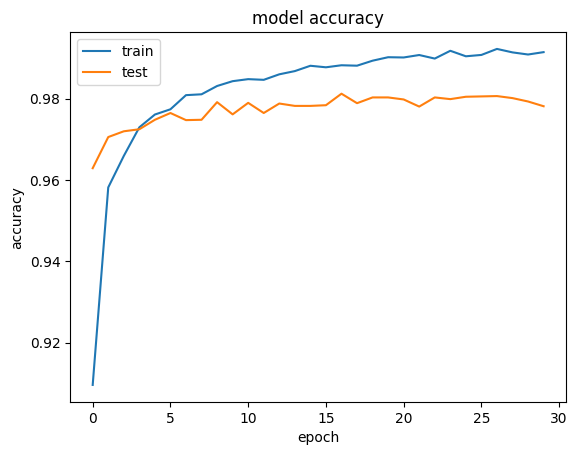

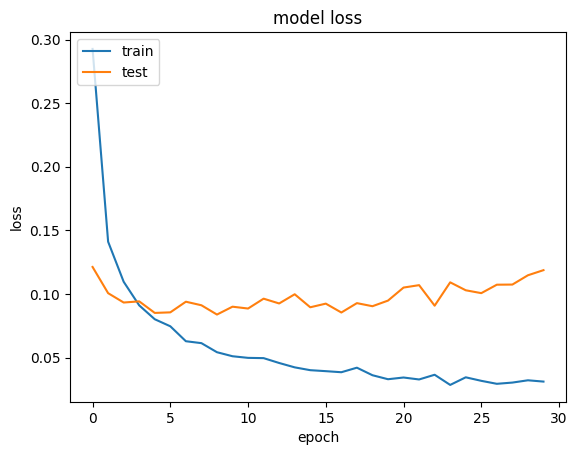

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = model_6.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9760 - loss: 0.1266
Test accuracy: 0.979200005531311


In [ ]:
model_6.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_layer (Dense)                  │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_2 (Dense)                │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_3 (Dense)                │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_4 (Dense)                │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,797,088 (10.67 MB)

 Trainable params: 932,362 (3.56 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,864,726 (7.11 MB)

In [ ]:
model_6.weights

[<KerasVariable shape=(784, 512), dtype=float32, path=sequential_6/dense_layer/kernel>,
 <KerasVariable shape=(512,), dtype=float32, path=sequential_6/dense_layer/bias>,
 <KerasVariable shape=(512, 512), dtype=float32, path=sequential_6/dense_layer_2/kernel>,
 <KerasVariable shape=(512,), dtype=float32, path=sequential_6/dense_layer_2/bias>,
 <KerasVariable shape=(512, 512), dtype=float32, path=sequential_6/dense_layer_3/kernel>,
 <KerasVariable shape=(512,), dtype=float32, path=sequential_6/dense_layer_3/bias>,
 <KerasVariable shape=(512, 10), dtype=float32, path=sequential_6/dense_layer_4/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential_6/dense_layer_4/bias>]

In [ ]:
model_6.get_config()

{'name': 'sequential_6',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_6'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kerne